<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# La poste - création du modèle
</div>

In [1]:
import tensorflow as tf
from keras import layers, Sequential, Input
from keras.datasets import mnist
from keras.layers import Conv2D
from keras.utils import plot_model

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from laposte_model_creation import *

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [2]:
verbose=0

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Chargement des données
</div>

Pour ce projet, nous nous basons sur les données mnist

In [3]:
(x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = mnist.load_data()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.1. Pré-processing
</div>

In [4]:
# Model / data parameters
num_classes = np.unique(y_train_origin).shape[0] # doit être 10
input_shape = (28, 28, 1)

In [5]:
# pré-processing
x_train, y_train = preprocess_data(x_train_origin, y_train_origin, nb_classes=num_classes, verbose=verbose)
x_test, y_test = preprocess_data(x_test_origin, y_test_origin, nb_classes=num_classes, verbose=verbose)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Build the model
</div>

In [6]:
batch_size = 128
epochs = 5

In [7]:
model3 = Sequential(
    [
        Input(shape=input_shape, name="entree"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print(model3.summary())
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history3 = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print(model3.evaluate(x_test,  y_test, verbose=2))
plot_history(history3.history,loss_name='loss', precision='accuracy', loss_val_name='val_loss', precision_val='val_accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [10]:
plot_model(model3, to_file=r"C:\Users\User\WORK\workspace-ia\PROJETS\projet_laposte\img\model3.png", show_shapes=True)

NameError: name 'plot_model' is not defined

In [8]:
predictions = model3(x_test[:1]).numpy()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

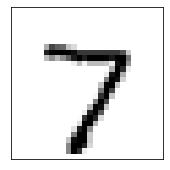

In [9]:
plot_pred(x=x_test, y=y_test, predictions=predictions, range=range(0,1))

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.2. Optimize the model
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.3. Graph model
</div>

In [ ]:
graph_function = tf.function(model3)